# Sistema de recomendación de restaurantes

> **Nombre**: *Mª Inmaculada*

> **Apellidos**: *Caballero Carrero*

> **E-mail**: *inmacaballerocarrero@gmail.com*

Este sistema de recomendación consiste en recomendar restaurantes basándose en las valoraciones de las personas que suele opinar lo mismo que tú y en el tipo de comida que más te gusta, usando la información sobre lo que habitualmente sueles comer.

El sistema de recomendación va a recibir 4 parámetros: <br>
-El dataset con las valoraciones de los clientes sobre las características de los restaurantes. <br>
-El nombre de la persona a la que le vamos a recomendar los restaurantes. <br>
-Un dataframe donde contenga la información de los restaurantes a los que ha ido la persona a recomendar, en el último año, junto con el tipo de comida que ha consumido.<br>
-La provincia de la persona a la que le vamos a recomendar los restaurantes.

En primer lugar, vamos a leer los datos de las diferentes opiniones de los clientes sobre algunos restaurantes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
opiniones_rest=pd.read_csv("opiniones_rest.csv")
opiniones_rest

,Cliente,Nombre Restaurante,Localización,Comida,Servicio,Local,Precio,Tipo de comida
0,David,La mar de gambas,Sevilla,8.5,7,8,Medio,Tapas española
1,David,La gorda de las Setas,Sevilla,9.0,6,7,Bajo,Tapas española
2,David,Tostadero,Granada,10.0,9,10,Bajo,Tapas española
3,David,Dúo Tapas,Sevilla,5.0,4,2,Medio,Tapas española
4,David,El Maestranza,Granada,9.0,8,7,Medio,Tapas española
5,David,La MalvaLoca,Sevilla,6.0,5,7,Medio,Tapas española
6,David,La Bartola,Sevilla,9.0,7,6,Bajo,Tapas española
7,David,Taberna del Arenal,Sevilla,10.0,9,10,Bajo,Tapas española
8,David,Burger King,Sevilla,6.0,6,6,Bajo,Americana
9,David,Hard Rock Café,Sevilla,8.0,8,7,Alto,Americana


El objetivo es darle una lista de recomendaciones de restaurantes que no ha visitado a Inma. En primer lugar, habría que seleccionar aquellos restaurantes que son de la provincia de Inma, que es Sevilla. 

In [3]:
op_rest_sev=opiniones_rest[opiniones_rest["Localización"]=="Sevilla"].drop(['Localización'], axis=1)
op_rest_sev

,Cliente,Nombre Restaurante,Comida,Servicio,Local,Precio,Tipo de comida
0,David,La mar de gambas,8.5,7,8,Medio,Tapas española
1,David,La gorda de las Setas,9.0,6,7,Bajo,Tapas española
3,David,Dúo Tapas,5.0,4,2,Medio,Tapas española
5,David,La MalvaLoca,6.0,5,7,Medio,Tapas española
6,David,La Bartola,9.0,7,6,Bajo,Tapas española
7,David,Taberna del Arenal,10.0,9,10,Bajo,Tapas española
8,David,Burger King,6.0,6,6,Bajo,Americana
9,David,Hard Rock Café,8.0,8,7,Alto,Americana
10,David,Zhen Bao,7.0,6,7,Medio,China
11,David,San Marco,9.0,8,9,Alto,Italiana


Ahora vamos a construir una tabla donde cada cliente pondera el bar a partir de las variables que tenemos en la tabla anterior. 

Esta ponderación va a venir dada por la media de las notas en comida, servicio y local. Y según sea mayor o menor que 7, vamos a reducir o aumentar esta media, en función del valor del precio si es alto, medio o bajo.

In [4]:
def valor_rest(comida,servicio,local,precio):
    valor_rest=[]
    for (i,j,k,l) in zip(comida,servicio,local,precio):
        media=(i+j+k)/3
        if media>=7:
            if l == "Alto":
                    valor_rest.append(media-1)
            elif l == "Bajo":
                     valor_rest.append(min(10,media+1))
            elif l == "Medio":
                    valor_rest.append(media)
        else:
            if l == "Alto":
                    valor_rest.append(max(0,media-1))
            elif l == "Bajo":
                     valor_rest.append(media+1)
            elif l == "Medio":
                    valor_rest.append(media)
        
    return np.round(np.array(valor_rest),4)

Vamos a añadir al dataframe anterior una columna con la valoración del bar obtenida mediante esta función, eliminando las columnas de comida, servicio, local y precio.

In [5]:
op_rest_sev["Valoración Restaurante"]=valor_rest(op_rest_sev["Comida"].values,op_rest_sev["Servicio"].values,op_rest_sev["Local"].values,op_rest_sev["Precio"].values)
op_rest_sev.drop(["Comida","Servicio","Local","Precio"],axis=1)

,Cliente,Nombre Restaurante,Tipo de comida,Valoración Restaurante
0,David,La mar de gambas,Tapas española,7.8333
1,David,La gorda de las Setas,Tapas española,8.3333
3,David,Dúo Tapas,Tapas española,3.6667
5,David,La MalvaLoca,Tapas española,6.0000
6,David,La Bartola,Tapas española,8.3333
7,David,Taberna del Arenal,Tapas española,10.0000
8,David,Burger King,Americana,7.0000
9,David,Hard Rock Café,Americana,6.6667
10,David,Zhen Bao,China,6.6667
11,David,San Marco,Italiana,7.6667


A continuación, vamos a crear un dataframe con las valoraciones genéricas de cada restaurante, calculadas mediante la función anterior. De esta manera, las columnas son los distintos restaurantes y las filas los clientes.

In [6]:
df=pd.DataFrame(columns=op_rest_sev["Nombre Restaurante"].unique())
df["Cliente"]=op_rest_sev["Cliente"].unique()
for (i,x) in enumerate(df["Cliente"].values):
    sel_x=op_rest_sev[op_rest_sev["Cliente"]==x]
    rest=list(sel_x["Nombre Restaurante"].values)
    val=list(sel_x["Valoración Restaurante"].values)
    df.loc[i,rest]=val
val_clientes=df.set_index("Cliente").astype(float)
val_clientes

,La mar de gambas,La gorda de las Setas,Dúo Tapas,La MalvaLoca,La Bartola,Taberna del Arenal,Burger King,Hard Rock Café,Zhen Bao,San Marco,...,Jin Ten Ke,La Chaparrita,El patio de San Eloy,McDonalds,Wan Bao,Los Coloniales,Chips Bar and Burger,KingDo,Parta Rosa,El paso de Piedras Negras
Cliente,,,,,,,,,,,,,,,,,,,,,
David,7.8333,8.3333,3.6667,6.0000,8.3333,10.0000,7.0000,6.6667,6.6667,7.6667,...,2.6667,6.3333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inma,6.0000,8.6667,2.6667,NaN,7.6667,NaN,7.3333,NaN,NaN,7.6667,...,2.6667,NaN,8.0000,7.3333,2.0000,NaN,NaN,NaN,NaN,NaN
Celia,5.0000,5.3333,8.3333,8.3333,8.6667,NaN,NaN,NaN,8.6667,NaN,...,NaN,6.6667,8.3333,8.3333,NaN,5.6667,6.6667,2.6667,5.3333,7.6667
Carla,5.3333,4.0000,NaN,NaN,NaN,7.6667,8.6667,8.3333,NaN,NaN,...,6.6667,4.3333,NaN,5.6667,4.3333,8.6667,NaN,NaN,NaN,NaN
Pedro,5.3333,NaN,6.6667,NaN,6.6667,10.0000,8.6667,7.6667,NaN,8.0000,...,NaN,NaN,NaN,6.6667,2.6667,10.0000,7.0000,NaN,5.3333,7.3333
Juan,7.6667,7.6667,3.0000,6.0000,NaN,9.3333,8.6667,NaN,9.0000,NaN,...,7.0000,6.6667,6.6667,NaN,6.6667,7.6667,3.3333,9.6667,NaN,NaN


Posteriormente, vamos a ver los restaurantes a recomendar, es decir, los restaurantes a los que Inma no ha ido.

In [7]:
rest_recomendar=[ i for i in val_clientes.columns if pd.isna(val_clientes.loc["Inma"][i])]
rest_recomendar

['La MalvaLoca',
 'Taberna del Arenal',
 'Hard Rock Café',
 'Zhen Bao',
 'La Gallina Blanca',
 'Foster Hollywood',
 'La Chaparrita',
 'Los Coloniales',
 'Chips Bar and Burger',
 'KingDo',
 'Parta Rosa',
 'El paso de Piedras Negras']

Para cada bar que no ha ido Inma, vamos a calcular una calificación que prediga cuánto le puede gusta ese bar a Inma. Esta calificación va a venir dada por la suma de dos marcadores:<br>
1.Suma ponderada de las valoraciones de los clientes que han ido a ese restaurante. <br>
2.Un marcador que me diga cuánto le gusta a la persona a recomendar el tipo de comida que tiene ese restaurante. 

-Calculamos el **primer marcador**:

Vamos a ver cuáles son los clientes que opinan similares a Inma. Este proceso lo vamos a realizar calculando la correlación de Pearson entre clientes, y en función de esa correlación, vamos a ponderarlos. Así, los que opinan similares a Inma tendrán más peso que el resto. 

In [8]:
matriz_corr=val_clientes.T.corr()
matriz_corr

Cliente,David,Inma,Celia,Carla,Pedro,Juan
Cliente,,,,,,
David,1.000000,0.851833,-0.211977,-0.098149,0.299268,0.395492
Inma,0.851833,1.000000,-0.071733,-0.230939,0.504194,0.292283
Celia,-0.211977,-0.071733,1.000000,0.047492,0.164952,-0.523223
Carla,-0.098149,-0.230939,0.047492,1.000000,0.723708,0.517657
Pedro,0.299268,0.504194,0.164952,0.723708,1.000000,0.228064
Juan,0.395492,0.292283,-0.523223,0.517657,0.228064,1.000000


Podemos observar que hay correlaciones negativas, lo que significa que ambos clientes opinan de forma muy distinta. El problema es que cuando predigamos el valor del restaurante, al ser esta ponderación negativa, me va a reducir ese valor y mi objetivo es que en ese caso, como son muy distintos, me pondere poco o nada. Por este motivo, vamos hacer una tranformación a la correlación para que sean valores entre 0 y 1.

In [9]:
matriz_corr_trans=(matriz_corr+1)/2
matriz_corr_trans

Cliente,David,Inma,Celia,Carla,Pedro,Juan
Cliente,,,,,,
David,1.000000,0.925916,0.394012,0.450926,0.649634,0.697746
Inma,0.925916,1.000000,0.464133,0.384531,0.752097,0.646141
Celia,0.394012,0.464133,1.000000,0.523746,0.582476,0.238388
Carla,0.450926,0.384531,0.523746,1.000000,0.861854,0.758828
Pedro,0.649634,0.752097,0.582476,0.861854,1.000000,0.614032
Juan,0.697746,0.646141,0.238388,0.758828,0.614032,1.000000


In [10]:
marcador1={}
for rest in rest_recomendar:
    #Crear una matriz con la ponderación y la valoración
    matriz = pd.concat([matriz_corr_trans["Inma"],val_clientes[rest]], axis=1)
    #Quitamos los que no valoran el restaurante
    matriz.dropna(axis=0,inplace=True,how="any")
    # Calculamos las puntuaciones ponderadas
    matriz["ws"] = matriz["Inma"] * matriz[rest]
    # Calculamos la suma de las ponderaciones
    suma_pond = matriz["Inma"].sum()
    # Calculamos la suma de las puntuaciones ponderadas
    suma_w = matriz["ws"].sum()
    # Dividimos entre la suma de las ponderaciones
    sumapon=suma_w/suma_pond
    #Añadimos el marcador 1 al diccionario
    marcador1[rest]=round(sumapon,4)
marcador1

{'La MalvaLoca': 6.5319,
 'Taberna del Arenal': 9.5097,
 'Hard Rock Café': 7.3421,
 'Zhen Bao': 7.863,
 'La Gallina Blanca': 7.7626,
 'Foster Hollywood': 5.9742,
 'La Chaparrita': 6.1685,
 'Los Coloniales': 8.2057,
 'Chips Bar and Burger': 5.6448,
 'KingDo': 6.7405,
 'Parta Rosa': 5.3333,
 'El paso de Piedras Negras': 7.4605}

-Calculamos el **segundo marcador**:

Vamos a ver, en función de el tipo de comida que Inma ha consumido en el último año, una calificación de cuánto le gusta a Inma los diferentes tipos de comida que hay en los restaurantes.

In [11]:
pref_tip_comida=pd.read_csv("prefe_cliente_recom.csv")
pref_tip_comida

,Nombre Restaurante,Tipo de comida
0,La mar de gambas,Tapas española
1,La mar de gambas,Tapas española
2,El patio de San Eloy,Tapas española
3,Dúo Tapas,Tapas española
4,La Bartola,Tapas española
5,La mar de gambas,Tapas española
6,El patio de San Eloy,Tapas española
7,La mar de gambas,Tapas española
8,El patio de San Eloy,Tapas española
9,La mar de gambas,Tapas española


Por tanto, vamos a calcular ahora la frecuencia relativa de cada tipo de comida.

In [12]:
frec_rel_tpcom=pd.value_counts(pref_tip_comida["Tipo de comida"])/len(pref_tip_comida["Tipo de comida"])
frec_rel_tpcom

Tapas española    0.516484
Italiana          0.307692
Mexicana          0.087912
Americana         0.065934
China             0.021978
Name: Tipo de comida, dtype: float64

Por otro lado, vamos a ver de qué tipo de comida son los restaurantes que hay que recomendarle a Inma. Esta información la vamos a obtener a partir de lo que han comido los clientes en los restaurantes.

In [13]:
tipcom_rest=op_rest_sev[["Nombre Restaurante","Tipo de comida"]].drop_duplicates().set_index(["Nombre Restaurante"])
tipcom_rest.loc[rest_recomendar]

,Tipo de comida
Nombre Restaurante,
La MalvaLoca,Tapas española
Taberna del Arenal,Tapas española
Hard Rock Café,Americana
Zhen Bao,China
La Gallina Blanca,Italiana
Foster Hollywood,Americana
La Chaparrita,Mexicana
Los Coloniales,Tapas española
Chips Bar and Burger,Americana


Como ya sabemos de qué tipo de comida son los restaurantes que no ha ido Inma. Vamos a crear una diccionario con la cantidad de cuánto le gusta a Inma el tipo de comida que hay en cada restaurante a recomendar.

In [14]:
marcador2={}
for rest in rest_recomendar:
    # Veamos de qué tipo de comida es el restaurante
    tip_com=tipcom_rest.loc[rest].values
    # Obtenemos la frecuencia relativa de Inma de ir a restaurantes con ese tipo de comida
    frec_rel=frec_rel_tpcom[tip_com].values[0]
    # Añadimos este valor al diccionario marcador2
    marcador2[rest]=round(frec_rel,4)
marcador2

{'La MalvaLoca': 0.5165,
 'Taberna del Arenal': 0.5165,
 'Hard Rock Café': 0.0659,
 'Zhen Bao': 0.022,
 'La Gallina Blanca': 0.3077,
 'Foster Hollywood': 0.0659,
 'La Chaparrita': 0.0879,
 'Los Coloniales': 0.5165,
 'Chips Bar and Burger': 0.0659,
 'KingDo': 0.022,
 'Parta Rosa': 0.3077,
 'El paso de Piedras Negras': 0.0879}

-Por último, realizamos la suma del primer y segundo marcador para cada restaurante.

In [15]:
calificacion={}
for rest in rest_recomendar:
    calificacion[rest] =min(10,marcador1[rest] + marcador2[rest])

calificacion

{'La MalvaLoca': 7.0484,
 'Taberna del Arenal': 10,
 'Hard Rock Café': 7.408,
 'Zhen Bao': 7.885000000000001,
 'La Gallina Blanca': 8.0703,
 'Foster Hollywood': 6.0401,
 'La Chaparrita': 6.2564,
 'Los Coloniales': 8.7222,
 'Chips Bar and Burger': 5.7107,
 'KingDo': 6.7625,
 'Parta Rosa': 5.641,
 'El paso de Piedras Negras': 7.5484}

Vamos a ordenar los restaurantes según la calificación obtenida.

In [16]:
pd.Series(calificacion,index=calificacion.keys()).sort_values(ascending=False)

Taberna del Arenal           10.0000
Los Coloniales                8.7222
La Gallina Blanca             8.0703
Zhen Bao                      7.8850
El paso de Piedras Negras     7.5484
Hard Rock Café                7.4080
La MalvaLoca                  7.0484
KingDo                        6.7625
La Chaparrita                 6.2564
Foster Hollywood              6.0401
Chips Bar and Burger          5.7107
Parta Rosa                    5.6410
dtype: float64

**Sistema de recomendación en general**

En general, para cualquier cliente, el sistema de recomendación vendría dado de la siguiente forma:

In [17]:
def sis_rec_bar(datos1,cliente,datos2,loc):
    #Filtramos mediante la localización loc los restaurantes de ese lugar.
    op_rest_loc=datos1[datos1["Localización"]==loc].drop(['Localización'], axis=1)
    #Añadimos la valoración del restaurante mediante la función valor_rest definida anteriormente y eliminamos las columnas
    #Comida, Servicio, Local y Precio.
    op_rest_loc["Valoración Restaurante"]=valor_rest(op_rest_loc["Comida"].values,op_rest_loc["Servicio"].values,op_rest_loc["Local"].values,op_rest_loc["Precio"].values)
    op_rest_loc.drop(["Comida","Servicio","Local","Precio"],axis=1)
    #Creamos el DataFrame con las valoraciones genérica de los clientes en cada restaurante.
    df=pd.DataFrame(columns=op_rest_loc["Nombre Restaurante"].unique())
    df["Cliente"]=op_rest_loc["Cliente"].unique()
    for (i,x) in enumerate(df["Cliente"].values):
        sel_x=op_rest_sev[op_rest_loc["Cliente"]==x]
        rest=list(sel_x["Nombre Restaurante"].values)
        val=list(sel_x["Valoración Restaurante"].values)
        df.loc[i,rest]=val
    val_clientes=df.set_index("Cliente").astype(float)
    #Calculamos los restaurantes a recomendar al cliente.
    rest_recomendar=[ i for i in val_clientes.columns if pd.isna(val_clientes.loc[cliente][i])]
    
    #Calculamos el primer marcador: SUMA PONDERADA DE LAS VALORACIONES DE LOS CLIENTES
        #Calculamos la matriz de correlación de Pearson a partir del DataFrame anterior.
    matriz_corr=val_clientes.T.corr()
        #Pasamos a [0,1] los valores de la correlación.
    matriz_corr_trans=(matriz_corr+1)/2
    marcador1={}
    for rest in rest_recomendar:
            #Crear una matriz con la ponderación y la valoración
            matriz = pd.concat([matriz_corr_trans["Inma"],val_clientes[rest]], axis=1)
            #Quitamos los que no valoran el restaurante
            matriz.dropna(axis=0,inplace=True,how="any")
            # Calculamos las puntuaciones ponderadas
            matriz["ws"] = matriz["Inma"] * matriz[rest]
            # Calculamos la suma de las ponderaciones
            suma_pond = matriz["Inma"].sum()
            # Calculamos la suma de las puntuaciones ponderadas
            suma_w = matriz["ws"].sum()
            # Dividimos entre la suma de las ponderaciones
            sumapon=suma_w/suma_pond
            #Añadimos el marcador 1 al diccionario
            marcador1[rest]=round(sumapon,4)
            
    #Calculamos el segundo marcador:PREFERENCIA GUSTO CLIENTE A RECOMENDAR
        #Calculamos cuánto le gusta al cliente a recomendar cada tipo de comida
    frec_rel_tpcom=pd.value_counts(datos2["Tipo de comida"])/len(datos2["Tipo de comida"]) 
        #Calculamos de qué tipo de comida es cada restaurante basándonos en los clientes
    tipcom_rest=op_rest_sev[["Nombre Restaurante","Tipo de comida"]].drop_duplicates().set_index(["Nombre Restaurante"])
    tipcom_rest.loc[rest_recomendar]
    marcador2={}
    for rest in rest_recomendar:
                # Veamos de qué tipo de comida es el restaurante
                tip_com=tipcom_rest.loc[rest].values
                # Obtenemos la frecuencia relativa de Inma de ir a restaurantes con ese tipo de comida
                frec_rel=frec_rel_tpcom[tip_com].values[0]
                # Añadimos este valor al diccionario marcador2
                marcador2[rest]=round(frec_rel,4)
                
    #Calculamos la calificación final de cada restaurante:
    calificacion={}
    for rest in rest_recomendar:
            calificacion[rest] = min(10, marcador1[rest] + marcador2[rest]) 
            #El mínimo se realiza para que no sobrepase la valoración del restaurante de un 10.
            
    #Por último,creamos una serie de los restaurantes a recomendar, ordenando cada restaurante por su clasificación predicha.
    return pd.Series(calificacion,index=calificacion.keys()).sort_values(ascending=False)


In [18]:
opiniones_rest=pd.read_csv("opiniones_rest.csv")
pref_tip_comida=pd.read_csv("prefe_cliente_recom.csv")
clie_rec="Inma"
loc="Sevilla"

recomendacion=sis_rec_bar(opiniones_rest,clie_rec,pref_tip_comida,loc)
recomendacion

Taberna del Arenal           10.0000
Los Coloniales                8.7222
La Gallina Blanca             8.0703
Zhen Bao                      7.8850
El paso de Piedras Negras     7.5484
Hard Rock Café                7.4080
La MalvaLoca                  7.0484
KingDo                        6.7625
La Chaparrita                 6.2564
Foster Hollywood              6.0401
Chips Bar and Burger          5.7107
Parta Rosa                    5.6410
dtype: float64

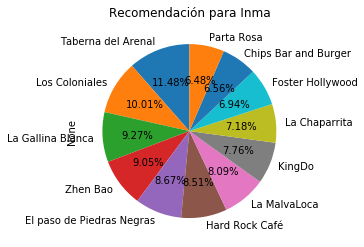

In [19]:
recomendacion.plot(kind="pie",title="Recomendación para "+clie_rec,autopct = "%0.2f%%",startangle = 90)
plt.show()